# 🚗 Trajdata Library Tutorial

This tutorial introduces the [`trajdata`](https://github.com/nvr-avg/trajdata) library for unified access to trajectory forecasting datasets. We'll explore how to use it from beginner to advanced levels.

# ⚙️ 1. Installation

```
first create conda env with python 3
Make sure you have installed the library and required dependencies found in github repo in pyproject.toml : https://github.com/NVlabs/trajdata
```


In [1]:
from trajdata import UnifiedDataset, AgentType
import matplotlib.pyplot as plt
import numpy as np

# 📁 2. Dataset Setup
```Define``` the path to the dataset you downloaded (`e.g., nuScenes-mini`).
please make sure that your dataset is structured as `DATASETS.md` in github link

In [2]:
data_dirs = {
    "nusc_mini": "/Users/mohammedbalkhair/Desktop/AV's/trajdata/datasets/nuscenes-mini"# replace it with your devece dir
}

# 📊 3. Load UnifiedDataset
We load a `UnifiedDataset` object that allows consistent access to `scenes, agents, and trajectories`.

In [3]:
'''dataset = UnifiedDataset(
    desired_data=["nusc_mini"],
    data_dirs={"nusc_mini": "/Users/mohammedbalkhair/Desktop/AV's/trajdata/datasets/nuscenes-mini"},
    incl_raster_map=True,
    raster_map_params={"px_per_m": 2.0, "map_size_px": 224},
    rebuild_cache=True,  #  forces clean rebuild
)'''
from collections import defaultdict
from trajdata.augmentation import NoiseHistories
noise_hists = NoiseHistories()

dataset = UnifiedDataset(
        desired_data=["nusc_mini"],
        centric="agent",
        desired_dt=0.1,
        history_sec=(3.2, 3.2),
        future_sec=(4.8, 4.8),
        only_predict=[AgentType.VEHICLE],
        agent_interaction_distances=defaultdict(lambda: 30.0),
        incl_robot_future=False,
        incl_raster_map=True,
        raster_map_params={
            "px_per_m": 2,
            "map_size_px": 224,
            "offset_frac_xy": (-0.5, 0.0),
        },
        augmentations=[noise_hists],
        num_workers=0,
        verbose=True,
        data_dirs={"nusc_mini": "/Users/mohammedbalkhair/Desktop/AV's/trajdata/datasets/nuscenes-mini"},
    )
scene = dataset.get_scene(0)
print("scene name : ", scene.name)
print("scene description : ", scene.description)

Loading data for matched scene tags: ['mini_train-nusc_mini-boston', 'singapore-mini_train-nusc_mini', 'nusc_mini-mini_val-boston', 'singapore-nusc_mini-mini_val']


Calculating Agent Data (Serially): 100%|██████████| 10/10 [00:00<00:00, 24442.33it/s]


10 scenes in the scene index.


Structuring Agent Data Index: 100%|██████████| 10/10 [00:00<00:00, 10691.57it/s]

scene name :  scene-0553
scene description :  wait at intersection, bicycle, large truck, peds crossing crosswalk, ped with stroller


`you can have a look at the scene class `
<details>
  <summary>Click to see scene class image</summary>
  
  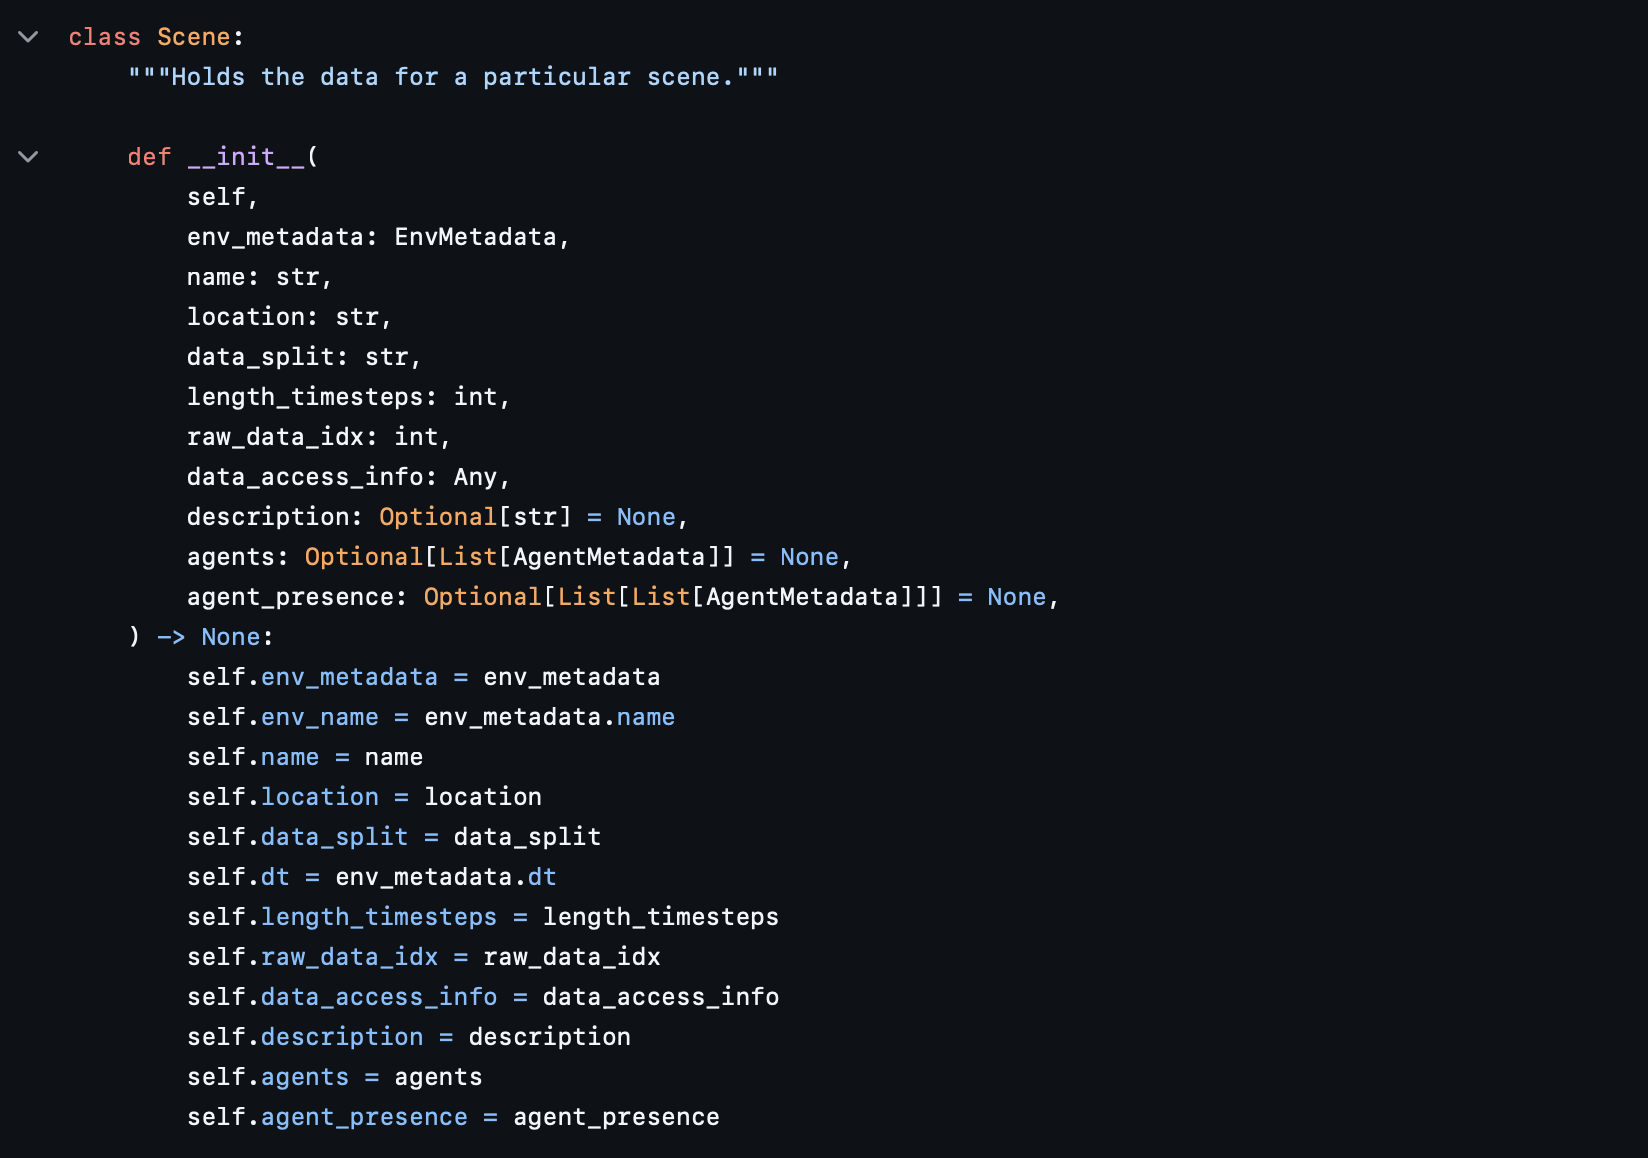

</details>

# 🔍 4. Access scene class Information
You can explore all scene data.

In [4]:
scene_metadata = scene.to_metadata()
print("1- env metadata:" ,scene.env_metadata)
print("\n2- name: ", scene.name)
print("\n3- location : ",scene.location)
print("\n4- data split : ",scene.data_split)
print("\n5- length timestamp : ",scene.length_timesteps)
print("\n6- length in seconds : ",scene.length_seconds())
print("\n7- Raw data index: ", scene.raw_data_idx)
print("\n8- data access info : ",scene.data_access_info)
print("\n9- description : ",scene.description)
print("\n10- list of agents: ", scene.agents)
print("\n11- agents presence : ",scene.agent_presence)
print("\n12- Total agents:", len(scene.agents))
#print(vars(scene))# to print the scene class variables 
#print(dir(scene))# to print the scene class functions 


1- env metadata: <trajdata.data_structures.environment.EnvMetadata object at 0x30909ec20>

2- name:  scene-0553

3- location :  boston-seaport

4- data split :  mini_train

5- length timestamp :  201

6- length in seconds :  20.1

7- Raw data index:  2

8- data access info :  {'token': '6f83169d067343658251f72e1dd17dbc', 'log_token': '881dd2f8aaec49b681eb54be5bf3b3e2', 'nbr_samples': 41, 'first_sample_token': '8687ba92abd3406aa797115b874ebeba', 'last_sample_token': 'dcbe451d383e450786aaad04ab9d3790', 'name': 'scene-0553', 'description': 'Wait at intersection, bicycle, large truck, peds crossing crosswalk, ped with stroller'}

9- description :  wait at intersection, bicycle, large truck, peds crossing crosswalk, ped with stroller

10- list of agents:  [VEHICLE/ego, PEDESTRIAN/19804c352c0a4767b61b8d0709d1db99, PEDESTRIAN/b61b72a5b5ad482e9bc94c203f75b8d4, BICYCLE/e2afd7eaa5c04cff9e59ca025e14249c, PEDESTRIAN/94e0b9b077774f18a74f53c5305a368d, VEHICLE/d02ce7e39f534cb8b67ef101e32dbba7, PEDEST

` you can have a look at agent class` trajdata/src/trajdata/data_structures/agent.py
<details>
  <summary>Click to see agent class image</summary>
  
  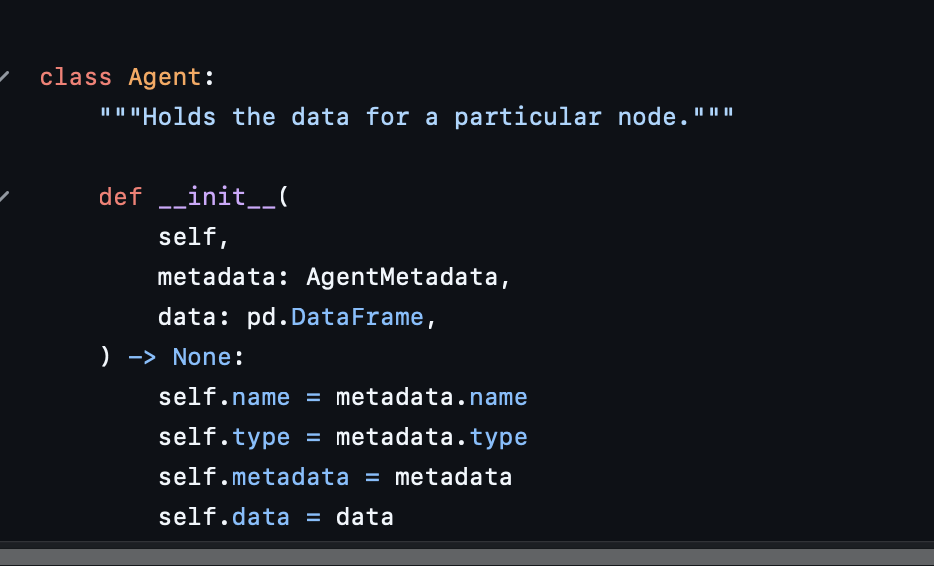

</details>

# 🔍 5. Filtering by Agent Type
you can use  `imoprt trajdata.filtering.filters` to import diffrent filters functions 
for example here You can filter agents by type: UNKNOWN, VEHICLE, PEDESTRIAN, BICYCLE,MOTORCYCLE. using `agent_types`

In [5]:
from trajdata.filtering.filters import agent_types
from trajdata import AgentType
# all agents in the scene
agents= scene.agents

# Filter agents to include only vehicles
filtered_agents = agent_types(agents=agents,no_types=None,only_types={AgentType.VEHICLE})
filtered_agents[:5]


[VEHICLE/ego,
 VEHICLE/d02ce7e39f534cb8b67ef101e32dbba7,
 VEHICLE/9c81acda9a6d4d15bd4e4a315a669d71,
 VEHICLE/2e19253f3bac458191cf64ff2b22ba2b,
 VEHICLE/6ae762f1bc254d00bfb5ae9d66ffe376]

# 📈 6. Visualize a Trajectory
We'll use Matplotlib to draw the agent's `historical and future trajectory.`

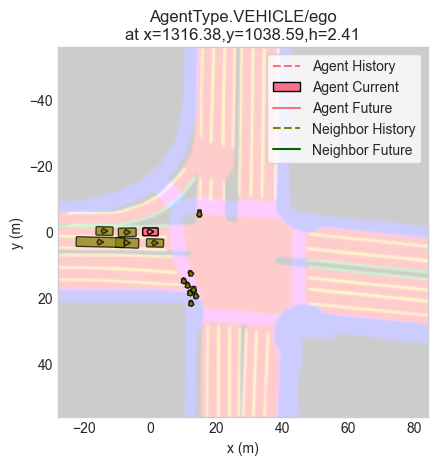

<Axes: title={'center': 'AgentType.VEHICLE/ego\nat x=1316.38,y=1038.59,h=2.41'}, xlabel='x (m)', ylabel='y (m)'>

In [6]:
from trajdata import UnifiedDataset
from trajdata.visualization.vis import plot_agent_batch_all,plot_agent_batch, plot_scene_batch
from trajdata.simulation import SimulationScene
import matplotlib.pyplot as plt
from trajdata.data_structures.state import StateArray


# Load dataset and scene

# Step 4: Create a simulation scene
sim_scene = SimulationScene(
    env_name="nusc_mini_sim",
    scene_name="sim_scene",
    scene=scene,
    dataset=dataset,
    init_timestep=0,
    freeze_agents=True,
)

# Step 5: Run simulation
obs = sim_scene.reset()
#print(obs)
for t in range(1, sim_scene.scene.length_timesteps):# loop throgh the scene timestamp
    new_xyh_dict = {}

    for idx, agent_name in enumerate(obs.agent_name):# update each agents state in this timestamp
        pos = obs.curr_agent_state[idx, :2]
        yaw = obs.curr_agent_state[idx, -1]
        next_state_array = np.concatenate([pos, [yaw]])
        next_state = StateArray.from_array(next_state_array, format="x,y,h")
        new_xyh_dict[agent_name] = next_state
    obs = sim_scene.step(new_xyh_dict)
    #plot_agent_batch(obs, batch_idx=0, legend=True,show=True,close=True)# remove this comment Visualize each frame 
    #plot_agent_batch_all(obs)# another function to visualise

# Step 6: Visualize the last frame
plot_agent_batch(obs, batch_idx=0, legend=True)

# 📦 7. plot dataloader batches based on agent
you can apply the same thing using `SceneBatch` but you should set the dataset `centric="scene"` when you loading the dataset above  using UnifiedDataset


<details>
  <summary>Click to show/hide image</summary>
  
  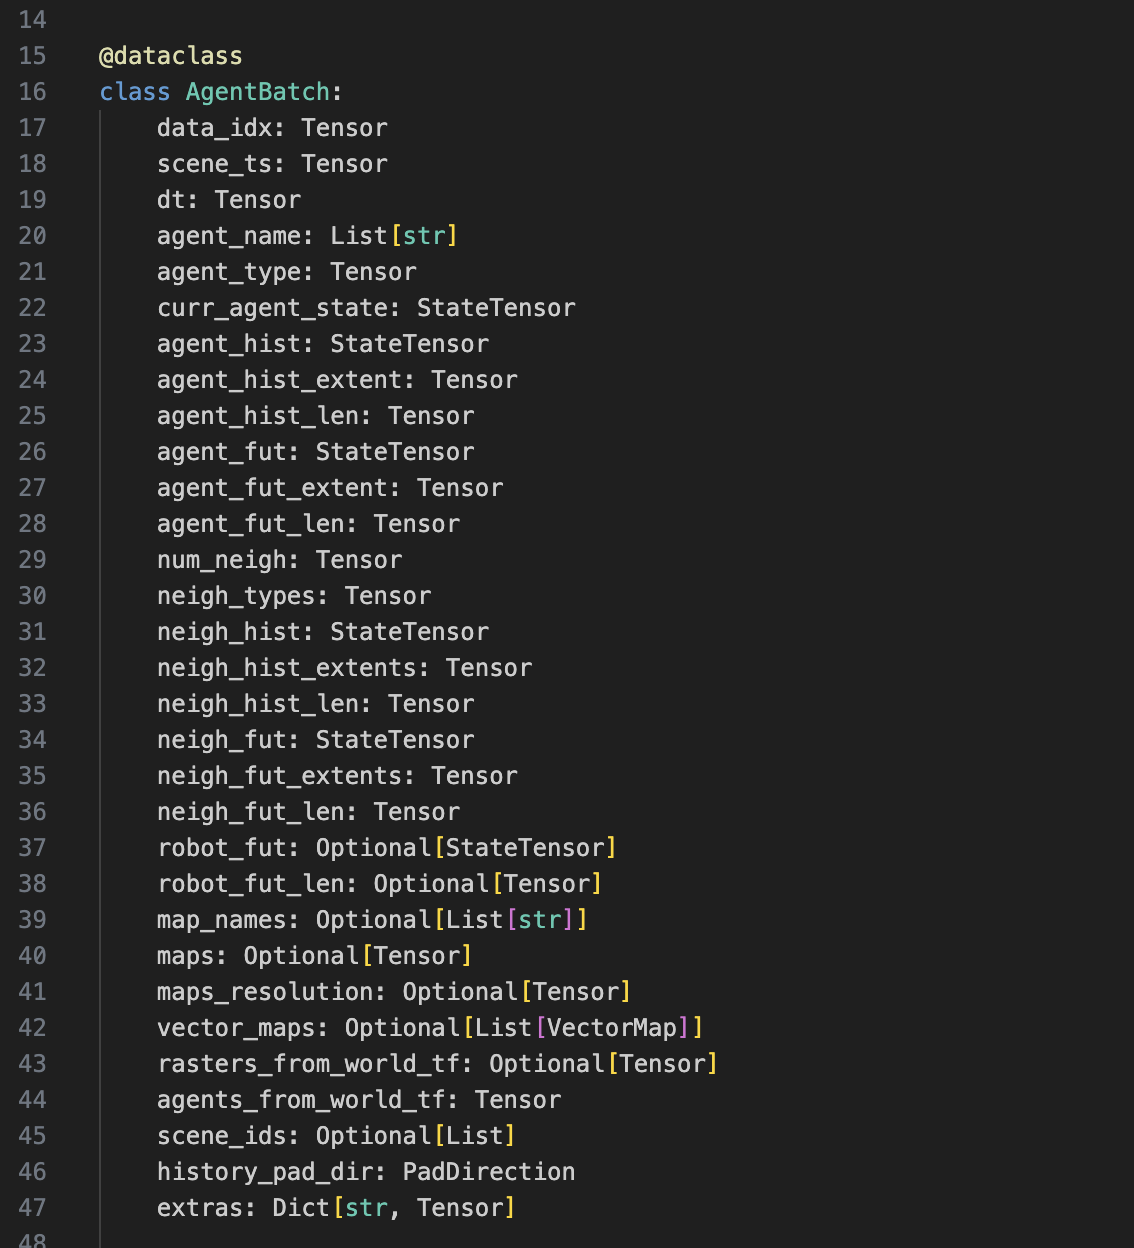

</details>

Batch size: 4 agents
Agent history shape: torch.Size([4, 33, 8])
Agent future shape: torch.Size([4, 48, 8])
Agent current state shape: torch.Size([4, 7])
Number of neighbors (first sample): 17
Map info available: True
Agent names: ['e8ee78065abc41ac9dcae839a29eac0b', 'e3c5b72c12c34c85aac247734ad83bef', '69385845cb9747b7afe095177cc405b5', '888521a8b57f46258e81a89bf062278b']


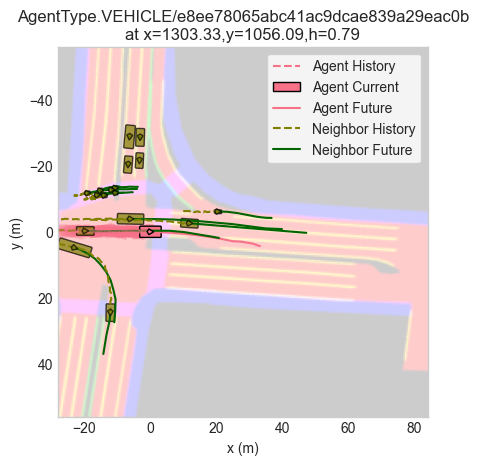

In [7]:
#! pip install selenium uncomment this to install selenium if you need 
from trajdata import AgentBatch
from torch.utils.data import DataLoader
from tqdm import tqdm
from trajdata.visualization.interactive_vis import plot_agent_batch_interactive
# Create DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True,
    collate_fn=dataset.get_collate_fn(),
    num_workers=0,
)

# Fetch one batch
batch: AgentBatch = next(iter(dataloader))

# Print batch details
print(f"Batch size: {len(batch.agent_name)} agents")
print(f"Agent history shape: {batch.agent_hist.shape}")   # [B, T, state_dim] the history timestamps , the states like x,y,z,dx,dy,xdd,ydd,h
print(f"Agent future shape: {batch.agent_fut.shape}")     # [B, T, state_dim] same for future
print(f"Agent current state shape: {batch.curr_agent_state.shape}")  # [B, state_dim]
print(f"Number of neighbors (first sample): {batch.num_neigh[0].item()}")
print(f"Map info available: {batch.maps is not None}")
print(f"Agent names: {batch.agent_name}")
plot_agent_batch(batch, batch_idx=0)# plot it here in notebook 
plot_agent_batch_interactive(batch,batch_idx=0,cache_path=dataset.cache_path) # plot it in web to interact with it


# 🎞️ 8. now after all these exploration let's tri to `animate` all these things
## please run this `command` to call the file i provide in `notebooks/Animation.py`

In [8]:
#! pip install selenium uncomment this to install selenium if you need 
! python Animation.py

Loading data for matched scene tags: ['nusc_mini-boston-mini_train', 'nusc_mini-singapore-mini_train', 'nusc_mini-boston-mini_val', 'nusc_mini-singapore-mini_val']
Calculating Agent Data (Serially): 100%|█████| 10/10 [00:00<00:00, 98922.26it/s]
10 scenes in the scene index.
Structuring Agent Data Index: 100%|██████████| 10/10 [00:00<00:00, 43464.29it/s]
# Data Samples: 16,520
Figure(640x480)
INFO:bokeh.server.server:Starting Bokeh server version 3.7.2 (running on Tornado 6.4.2)
INFO:bokeh.server.tornado:Check for unused sessions every 500 milliseconds
INFO:bokeh.server.tornado:Unused sessions last for 500 milliseconds
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)
INFO:tornado.access:200 GET / (::1) 700.91ms
INFO:tornado.access:200 GET /static/js/bokeh.min.js?v=5b74dbd22e38c51171f871973702aa79f54ff23ea2f60323446d118e71a0b292cc81d26415b4248908d4788b79b741b805ccbd6c9639e8a4921454cb1b44d480 (::1) 2.95ms
INFO:tornado.access:200 GET /static/js/bokeh-

# 🧾 9. Summary
## You've now learned how to:
- Load datasets using `trajdata`
- apply Filters
- Access and visualize agents trajectory
- grap data into dataloader and explore it's dimentions
- generate an Animation

## This covers beginner to intermediate use. Advanced usage includes:
- Custom augmentation pipelines
- Multi-agent modeling inputs
- Interfacing with trajectory forecasting models

`you can check trajdata official repo for more examples : https://github.com/NVlabs/trajdata `

# Made by : Mohammed Ahmed Balkhair


## POV : me while tring to understand 96 trajdata python files without resources or LLM's casue it's new libirary

![Description](https://i.pinimg.com/originals/e5/c0/f7/e5c0f72b15f5476214586fdb50898e55.gif)